In [179]:
# Part I : EDA - Exploratory Data Analysis & Pre-processing
# 1.1 Data Import: Import the dataset into python

import pandas as pd
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Load the dataset into dataframe
df_grocery = pd.read_csv('Wholesale_Data.csv')

# 1.2 Generating summary statistics and information about the data

# Display the first few rows of the DataFrame
print("First few rows:")
print(df_grocery.head())

# Display information about the dataset
print("\nInformation about the dataset:")
print(df_grocery.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df_grocery.describe())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df_grocery.shape)

First few rows:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergent

Since there is no null value in any of the columns, hence we can deduce there are no missing values in this dataset

In [180]:
# 1.2 Cleaning and EDA of dataset
# 1.2.1 checking for duplicates
duplicate_rows = df_grocery[df_grocery.duplicated()]

if duplicate_rows.shape[0] == 0:
    print("No duplicate rows found.")
else:
    print(f"{duplicate_rows.shape[0]} duplicate rows found.")
    print(duplicate_rows)    

No duplicate rows found.


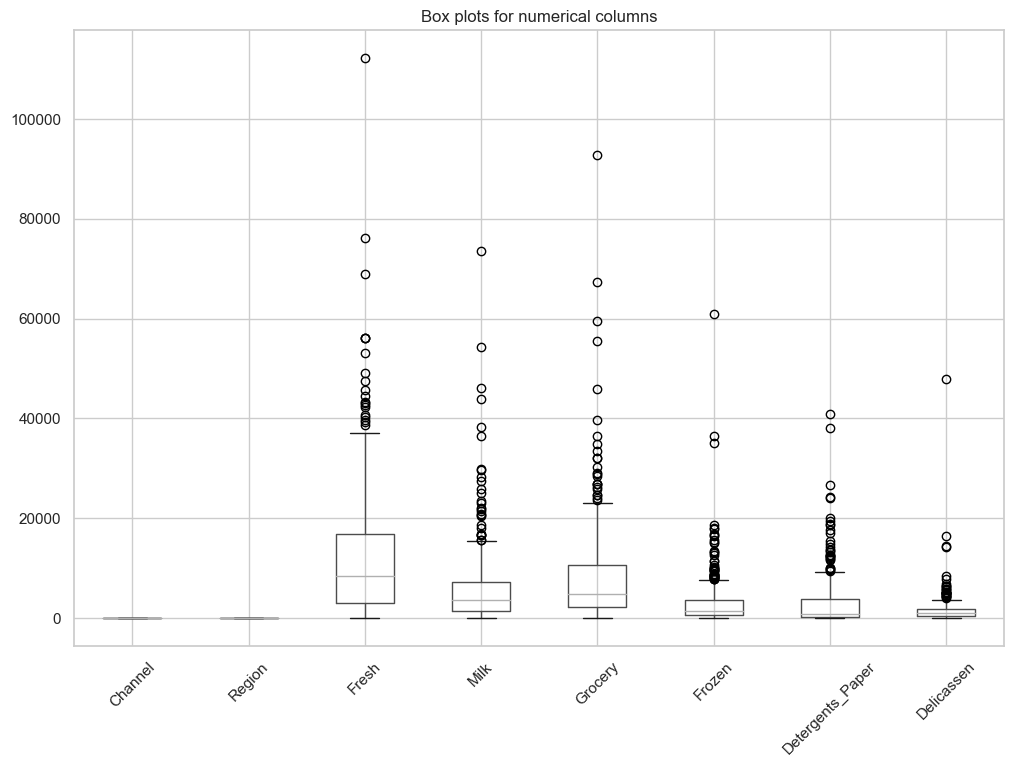

In [181]:
# 1.2.2 check for outliers
import matplotlib.pyplot as plt

numerical_columns = df_grocery.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
plt.title("Box plots for numerical columns")
numerical_columns.boxplot()
plt.xticks(rotation=45)
plt.show()

outliers have been detected in all columns. Since the data in each column is annual spending on a particular grocery item, it can have ideally any value. So we cannot be sure that the outlier detected is erroneous. It might be better to keep all outliers and proceed with further analysis

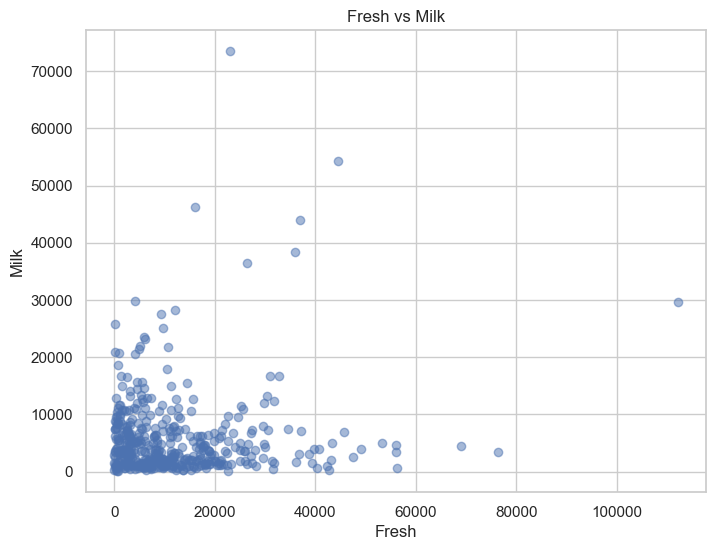

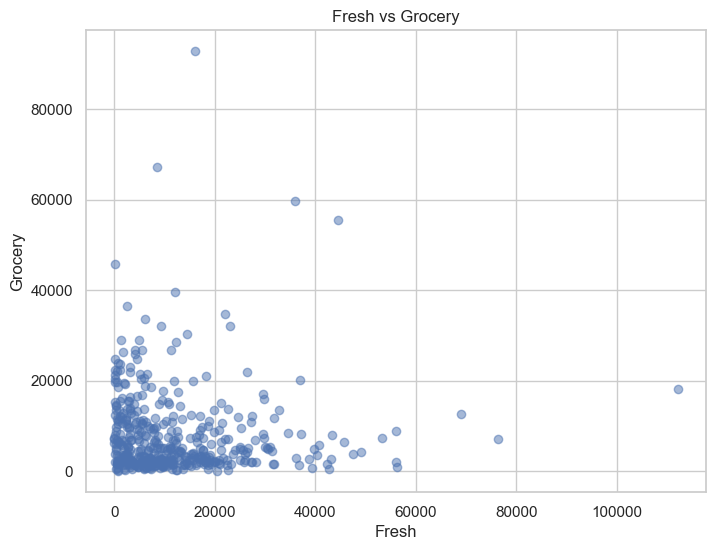

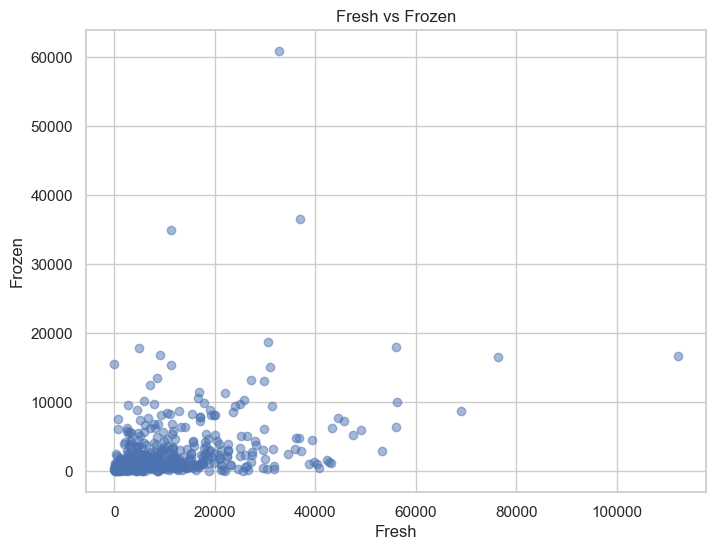

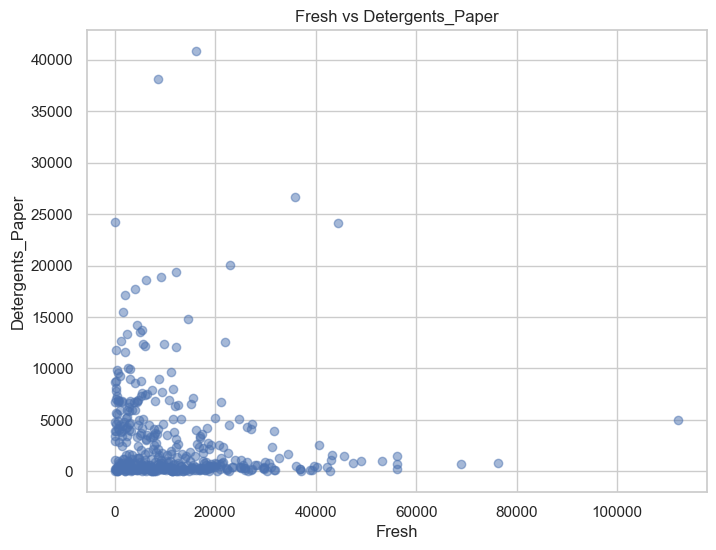

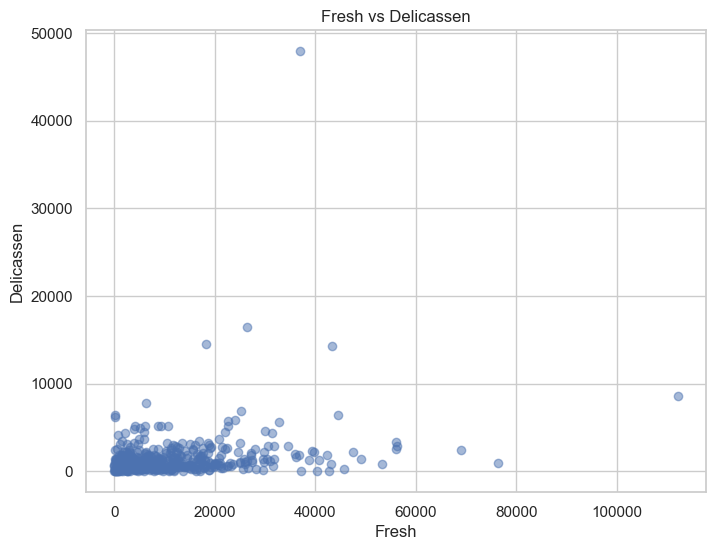

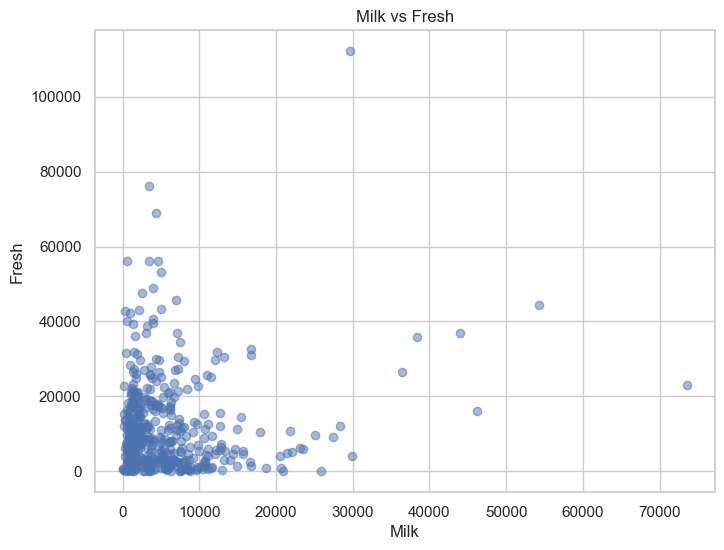

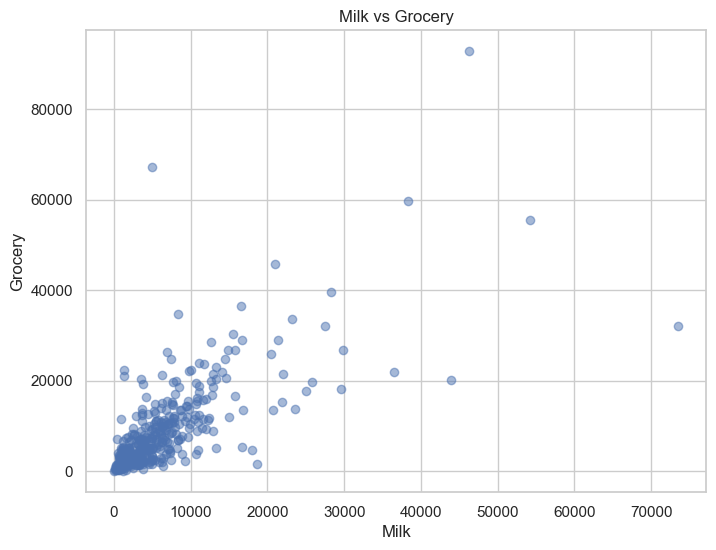

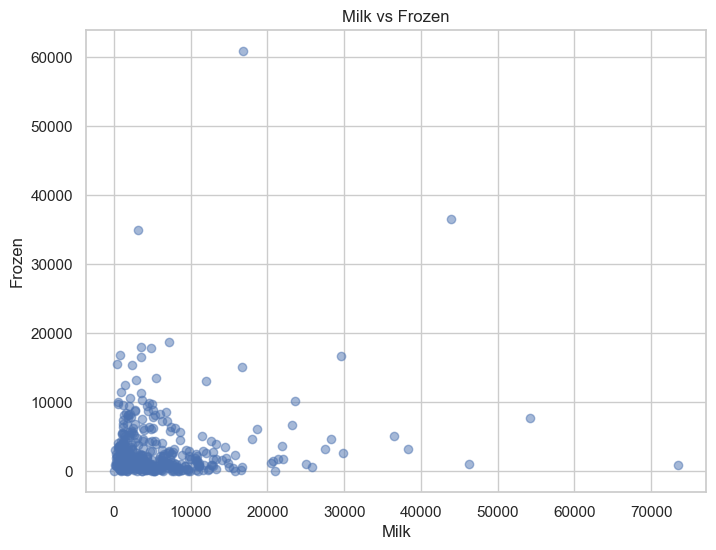

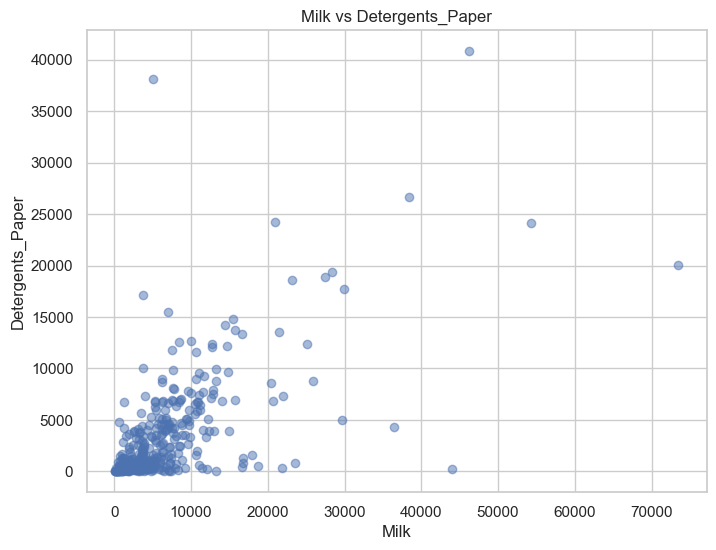

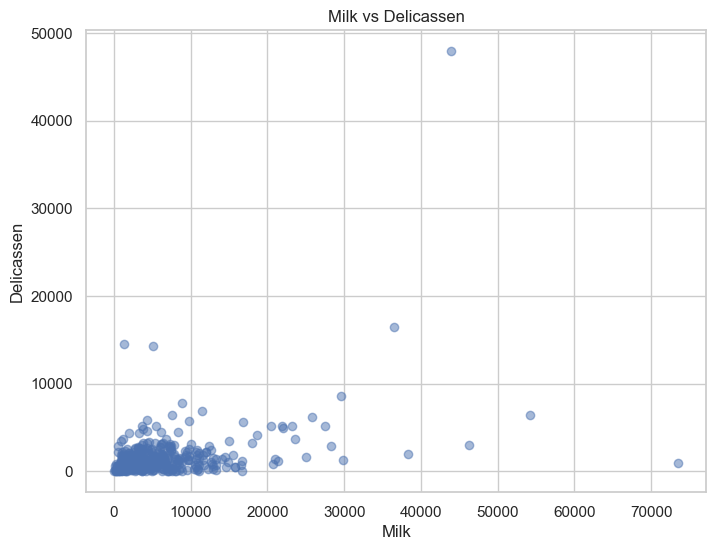

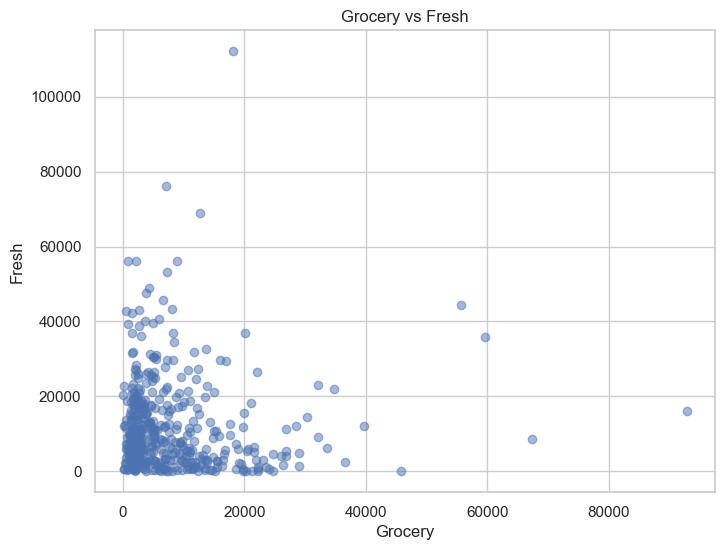

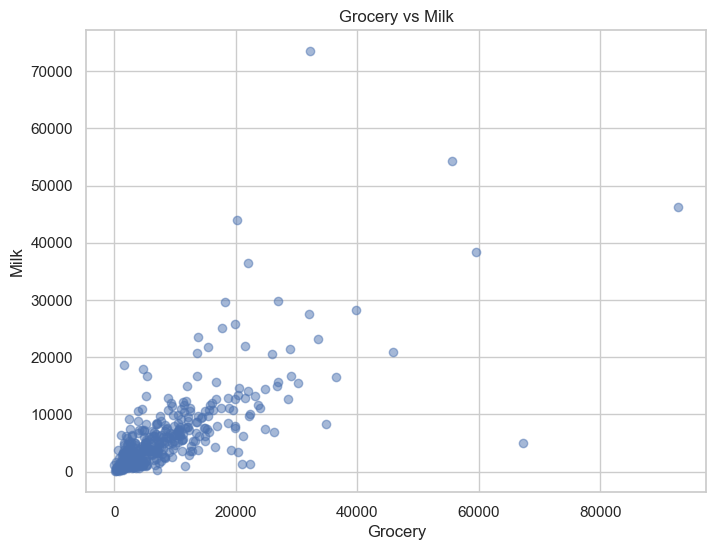

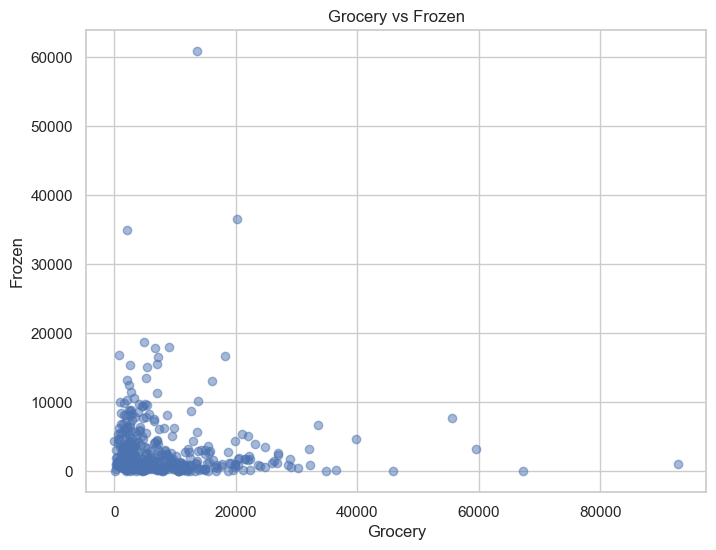

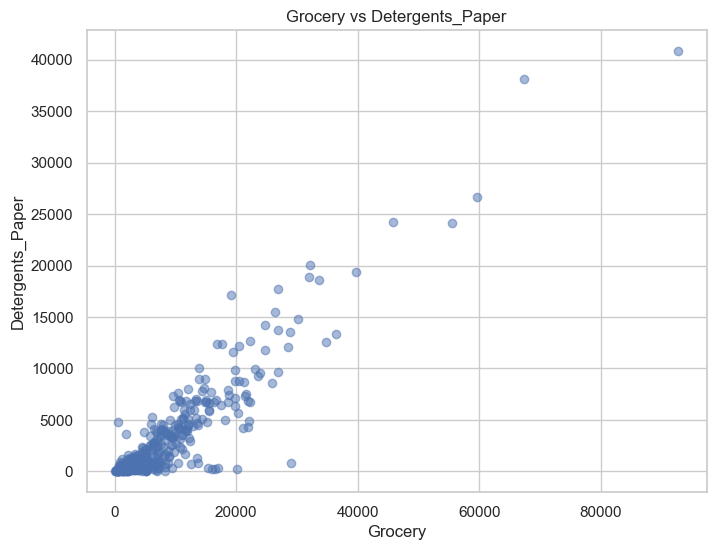

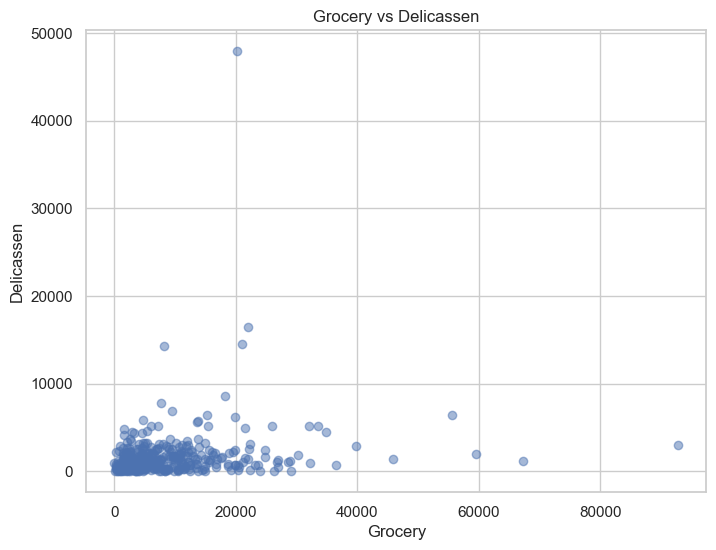

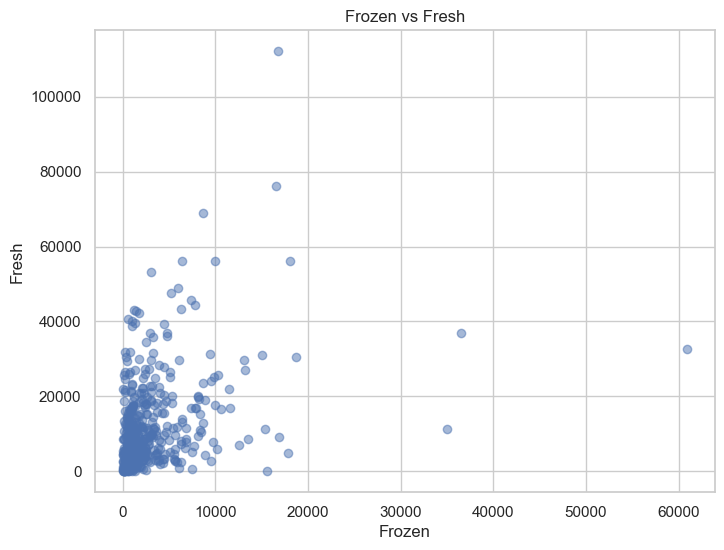

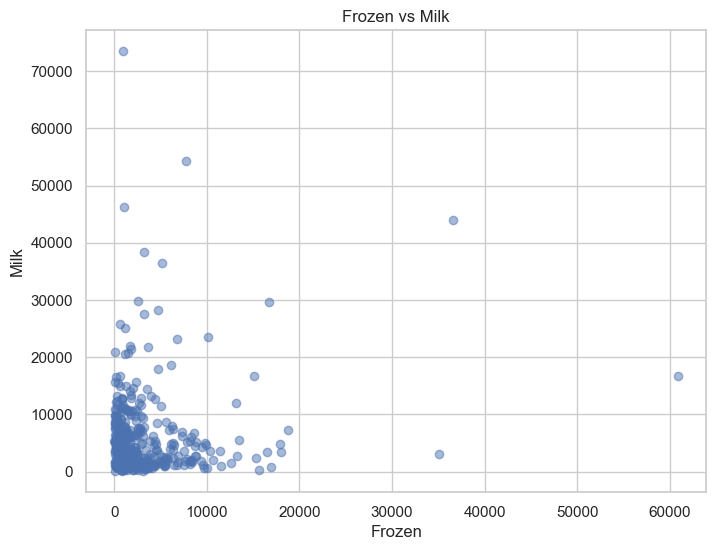

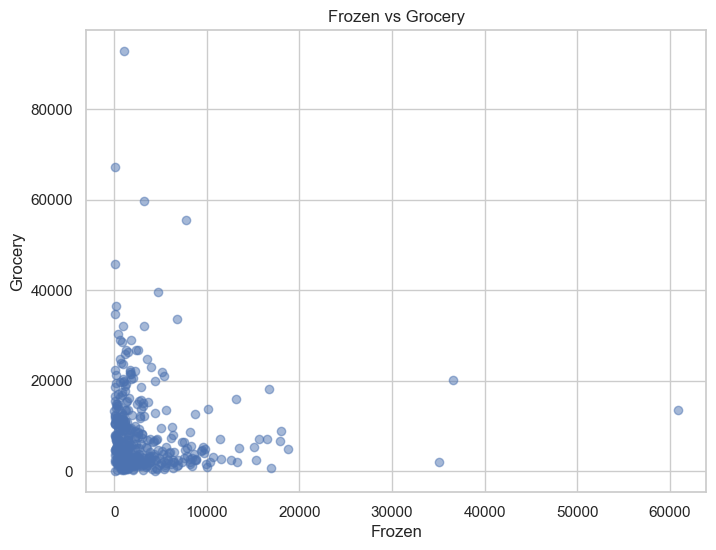

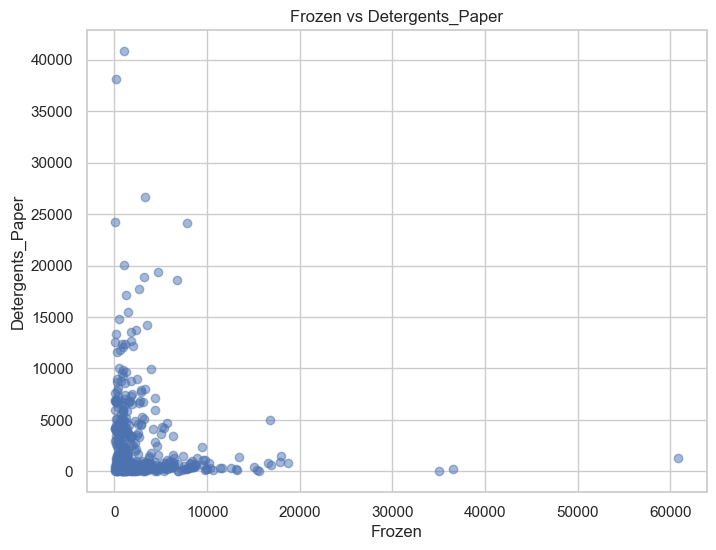

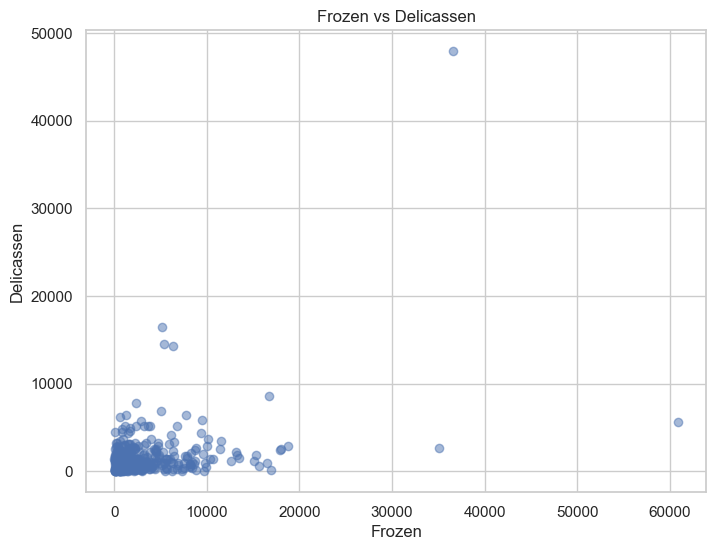

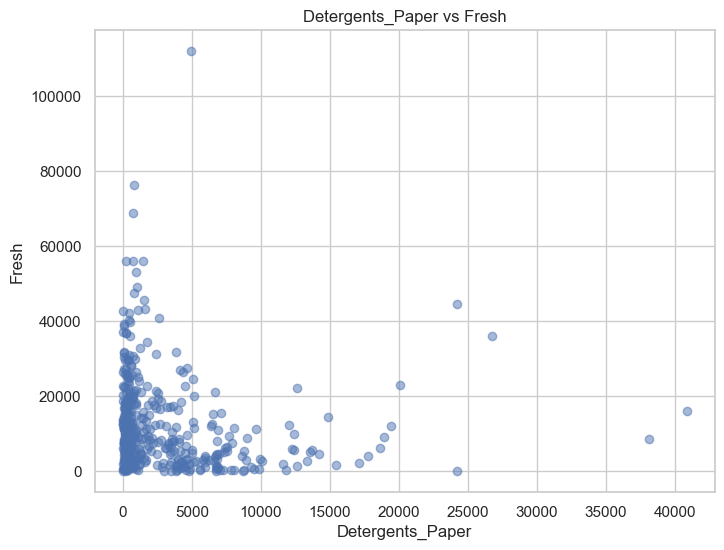

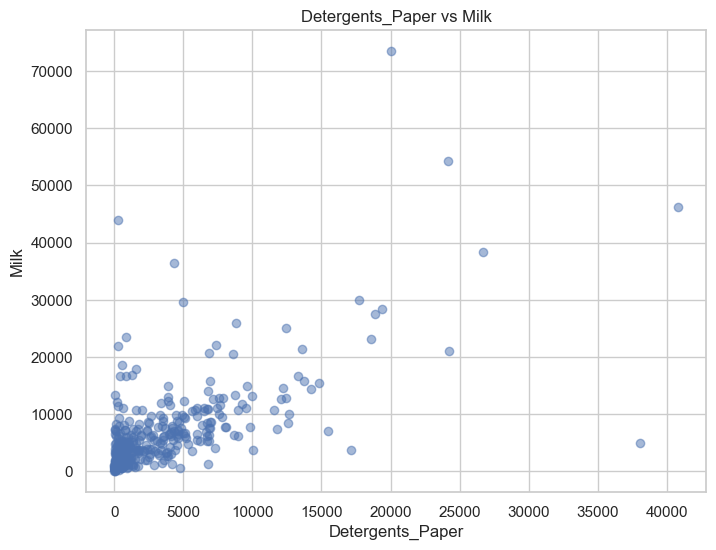

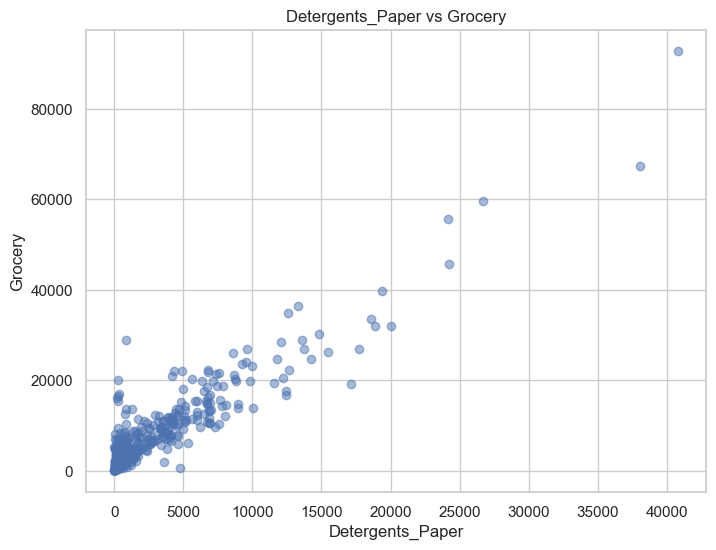

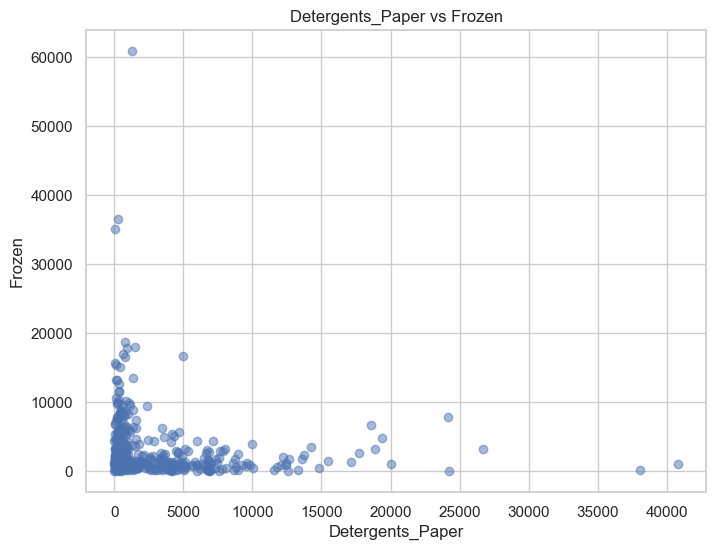

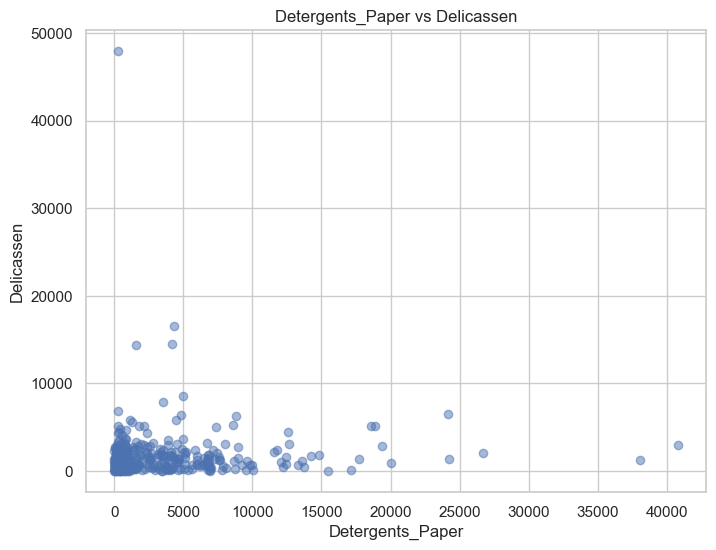

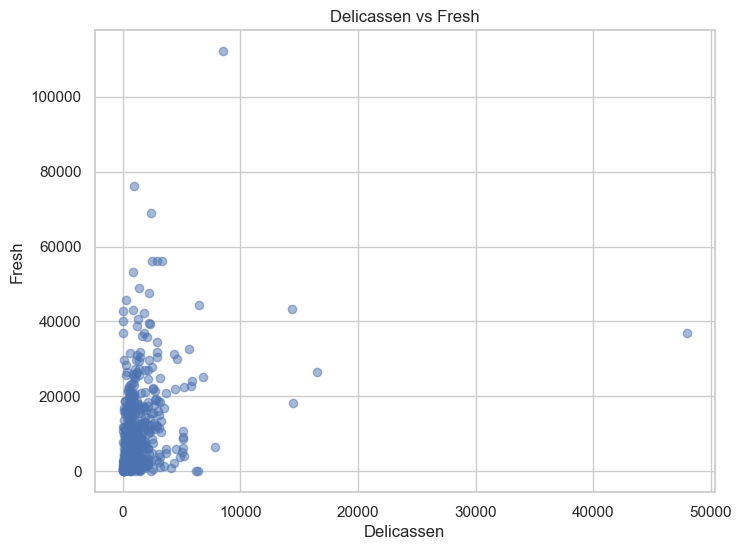

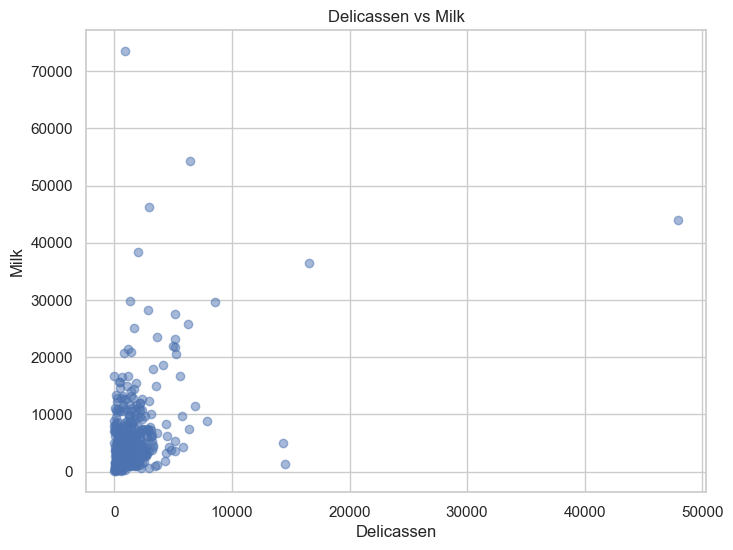

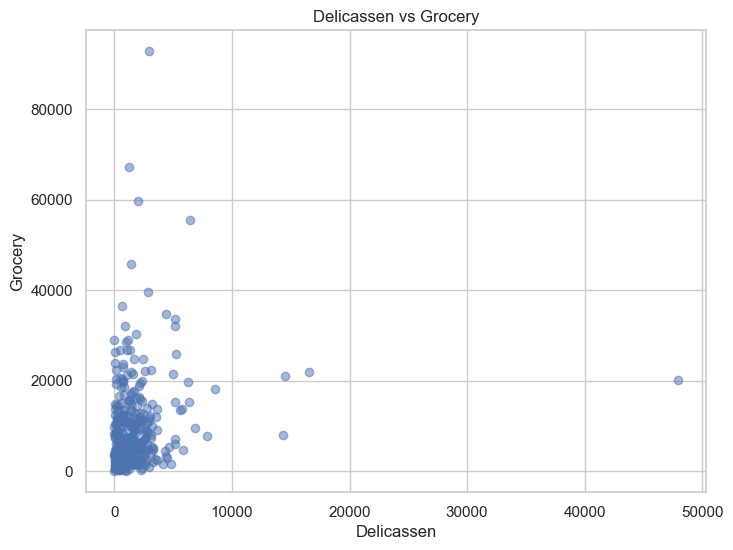

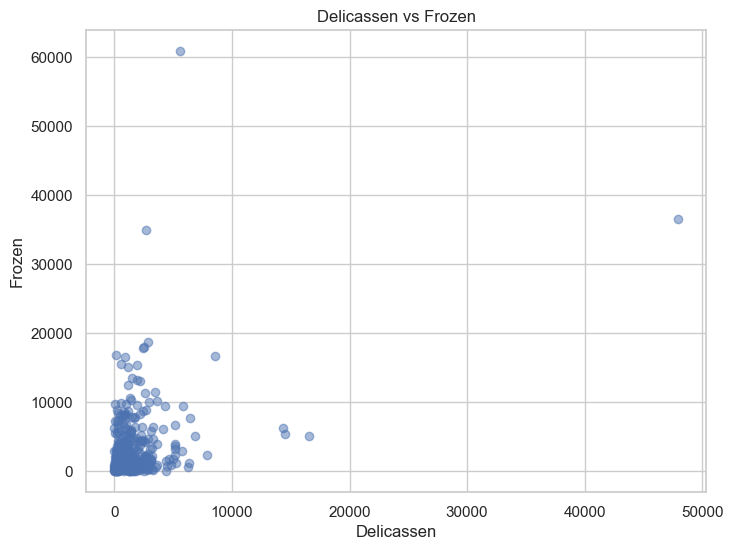

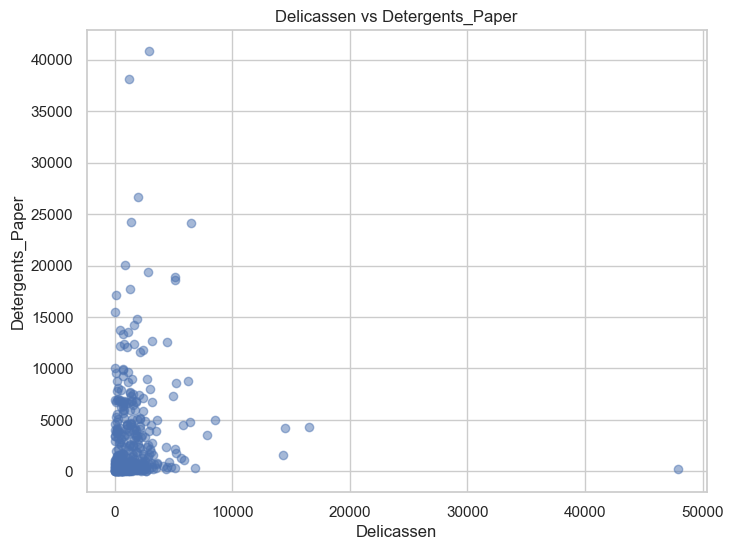

In [182]:
# 1.2.3 using scatter plots to visualise relation between features
import matplotlib.pyplot as plt
import seaborn as sns
#Select the columns to create scatter plots for
columns_to_plot = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create scatter plots
for i, column1 in enumerate(columns_to_plot):
    for j, column2 in enumerate(columns_to_plot):
        if i != j:
            plt.figure(figsize=(8, 6))
            plt.scatter(df_grocery[column1], df_grocery[column2], alpha=0.5)
            plt.title(f'{column1} vs {column2}')
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

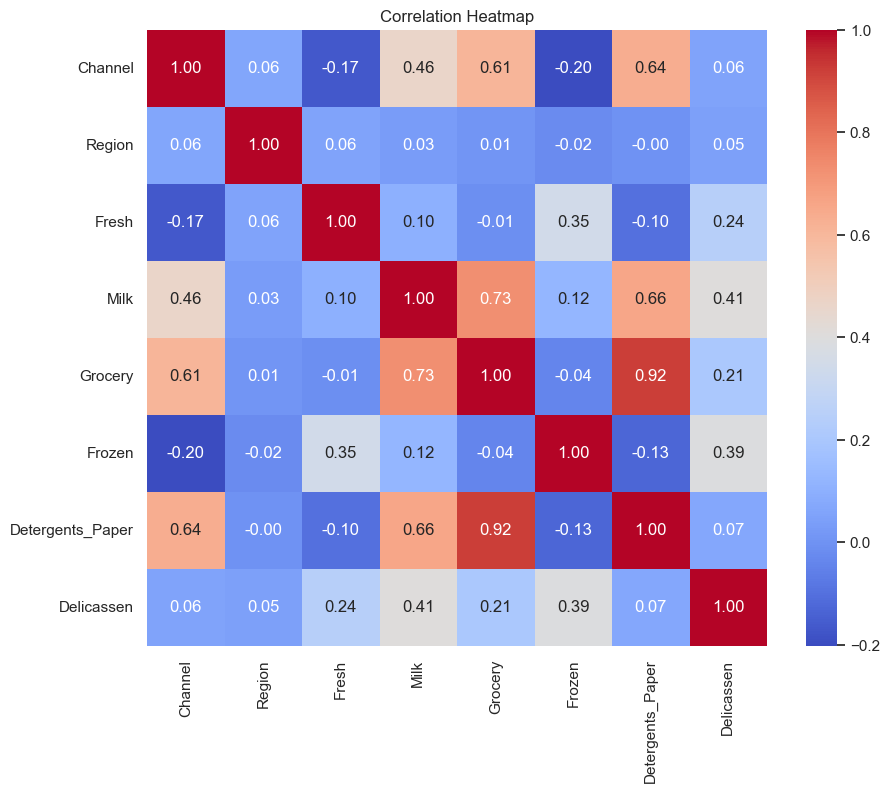

Correlation Matrix:
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery       

In [183]:
# 1.2.4  Calculate the correlation matrix
correlation_matrix = df_grocery.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

As can be seen from heat map and corelation matrix, there are variables which have strong corelation e.g grocery and milk, detergent paper and grocery

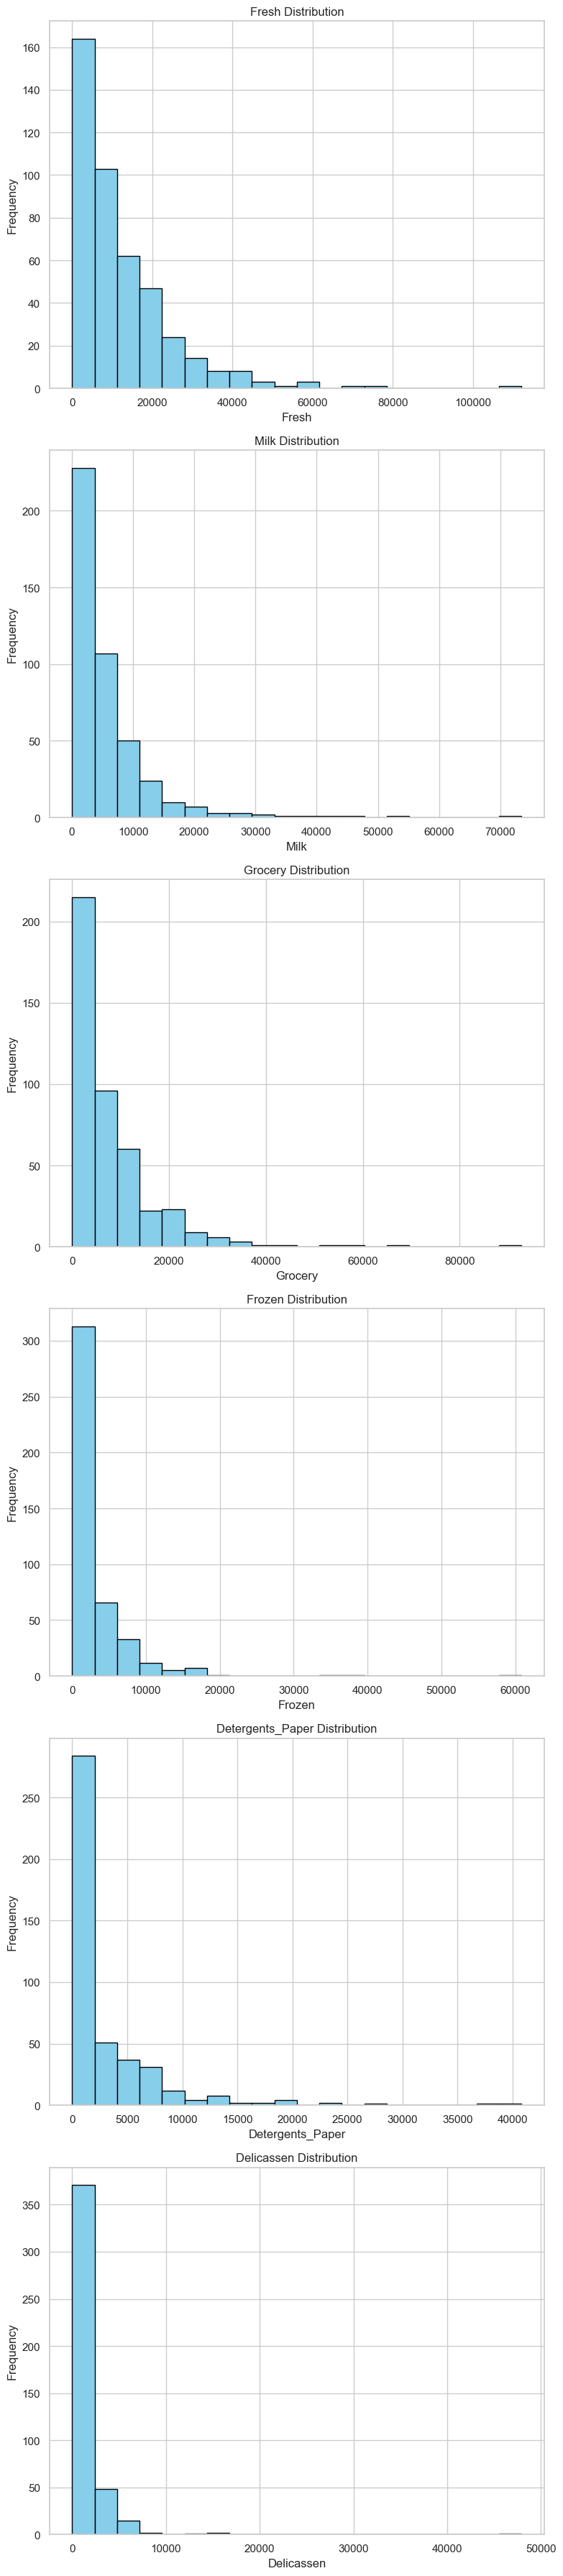

In [184]:
# 1.2.5 visulaising  the distribution of features
# Define the list of variables
variables = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Set up subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 6*len(variables)))

# Loop through variables and create histograms
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df_grocery[var], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{var} Distribution')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The distributions are skewed for the variables Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen

In [185]:
#1.2.6 scaling down the variables
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be scaled
columns_to_scale = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
df_grocery[columns_to_scale] = scaler.fit_transform(df_grocery[columns_to_scale])

# Now, df_grocery contains the scaled variables
df_grocery.head()

df_grocery.to_csv('scaled_grocery_data.csv', index=False)



In [186]:
#1.2.7 Normalising the variables

from sklearn.preprocessing import StandardScaler

# Define the columns to be normalized
columns_to_normalize = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the specified columns
df_grocery[columns_to_normalize] = scaler.fit_transform(df_grocery[columns_to_normalize])

# Now, df_grocery contains the normalized variables
df_grocery.head()



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [187]:
# 1.2.7 applying logarithmic transformations  to the variables
import numpy as np

# Define the columns to be transformed
columns_to_transform = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply the logarithmic transformation to the specified columns
df_grocery[columns_to_transform] = np.log1p(df_grocery[columns_to_transform])
# Check for NaN values
print(df_grocery.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


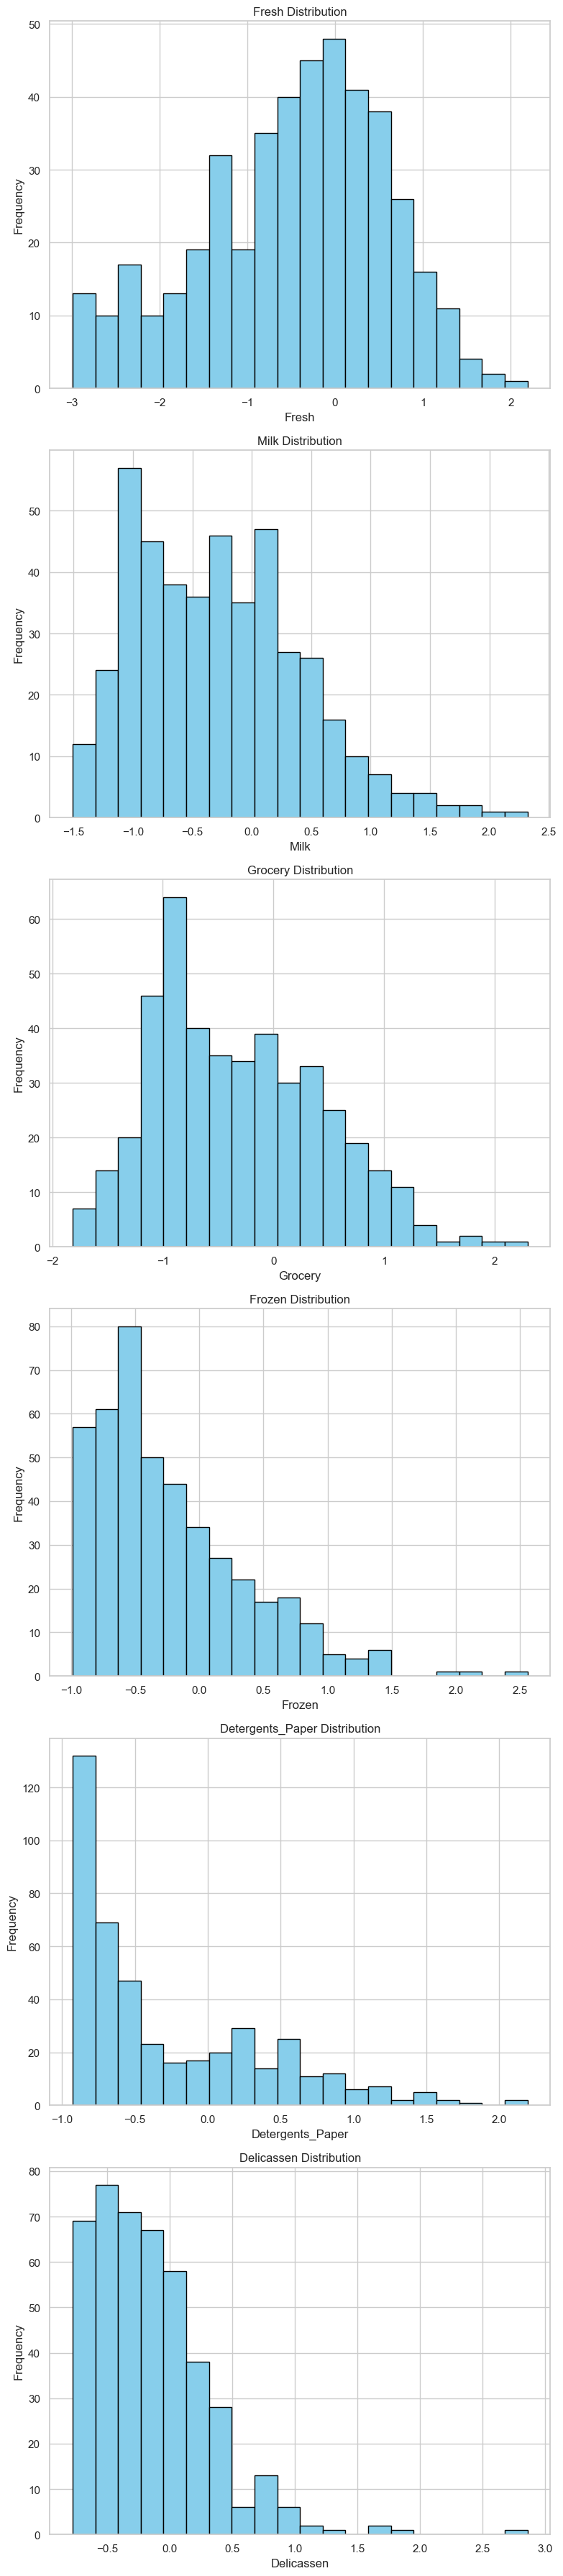

In [188]:
# checking again if there is change in shape of distribution after applying logarithmic transformation

variables = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Set up subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 6*len(variables)))

# Loop through variables and create histograms
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df_grocery[var], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{var} Distribution')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The distributions for fresh, milk and grocery became somewhat normalised
Although there is still skewness present in distributions of all variables, it has reduced slightly

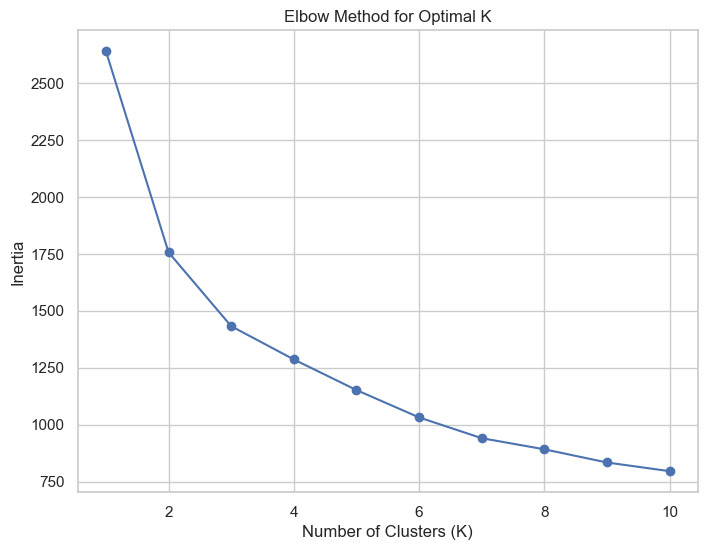

In [189]:
# Part 2 K-means clustering analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering (excluding Channel and Region)
features = df_grocery[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Using Elbow method to determine the optimal number of clusters (K) 
inertia_values = []
for k in range(1, 11):  # Test K values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



From the elbow graph, we can see the optimal number of clusters can be 4, 5 or 6. let us select 4 as number of clusters for clustering

In [190]:
# 2.1 Based on the Elbow Method, choose an optimal value 4 for k

optimal_k = 4

# Applying  K-means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Addiung the cluster labels back to the original DataFrame
df_grocery['Cluster'] = clusters

# Print the cluster centers (centroids)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print the cluster assignments for each data point
print("\nCluster Assignments:")
print(clusters)


Cluster Centers:
[[ 0.85701837  0.34951919  0.0977958   1.40054426 -0.3675079   1.29509109]
 [-0.36653286  1.00469168  1.15442566 -0.43727428  1.26962043  0.18625582]
 [-1.17187192 -0.39327235 -0.36837312 -0.5706395  -0.37720079 -0.46782913]
 [ 0.46459906 -0.71403164 -0.74553098  0.06265139 -0.65887167 -0.4114719 ]]

Cluster Assignments:
[1 1 0 3 0 1 3 1 2 1 1 3 1 1 1 3 1 0 0 2 3 3 0 0 0 1 3 3 1 3 0 2 3 0 2 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 3 2 3 1 3 2 1 1 3 1 2 1 1 1 3 1 2 1 0 3 0 0 3 0
 1 3 2 1 3 2 3 1 1 3 3 1 1 0 3 0 3 3 1 0 1 2 2 2 2 3 1 1 1 0 3 3 1 1 1 1 3
 1 0 3 3 3 3 3 3 3 3 3 3 1 3 0 3 1 2 3 3 2 3 3 3 3 1 2 3 2 0 3 3 3 3 1 3 3
 3 3 3 2 3 2 2 1 1 3 1 1 1 3 3 1 1 1 1 2 3 3 1 1 2 1 2 1 0 0 3 0 1 0 1 0 2
 3 3 1 1 1 3 3 3 1 3 0 0 1 3 3 1 1 0 2 2 1 3 2 2 1 3 1 3 1 1 1 1 3 1 3 3 1
 3 2 3 3 1 3 2 3 0 2 3 2 0 2 3 3 3 0 0 3 3 3 1 1 3 3 3 3 2 1 0 1 0 3 3 3 0
 3 3 3 3 2 1 0 1 0 1 3 3 2 2 3 2 2 0 3 3 1 2 1 0 0 0 3 3 3 3 3 2 3 2 1 3 2
 3 2 1 2 1 1 1 1 1 1 1 3 3 1 3 3 1 3 3 1 3 2 3 1 2 3 3 3 3 0

In [191]:
df_grocery.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,1.448652,0.590668,0.051580,0.421055,-0.041984,-0.890056,-0.044546,-0.068642,1
1,1.448652,0.590668,-0.496433,0.434673,0.157276,-0.314897,0.082876,0.085399,1
2,1.448652,0.590668,-0.592450,0.342552,-0.028561,-0.147962,0.125073,1.176589,0
3,-0.690297,0.590668,0.095411,-0.978219,-0.499188,0.523037,-0.690328,0.089302,3
4,1.448652,0.590668,0.609896,-0.053819,-0.082682,0.160296,-0.263859,0.832625,0


In [192]:
# 2.2 Cluster profiling

# Select relevant columns for clustering (excluding Channel and Region)
features = df_grocery[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Calculate the mean spending for each cluster and product category
cluster_profiles = features.groupby(df_grocery['Cluster']).mean()

# Print the cluster profiles
print(cluster_profiles)

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Cluster                                                                      
0        0.433015 -0.037909 -0.245076  0.606251         -0.515492    0.454180
1       -0.868269  0.419557  0.559241 -0.483562          0.566232   -0.062893
2       -1.724772 -0.556554 -0.599928 -0.562647         -0.521896   -0.367906
3        0.015665 -0.780521 -0.887024 -0.187110         -0.708009   -0.341626


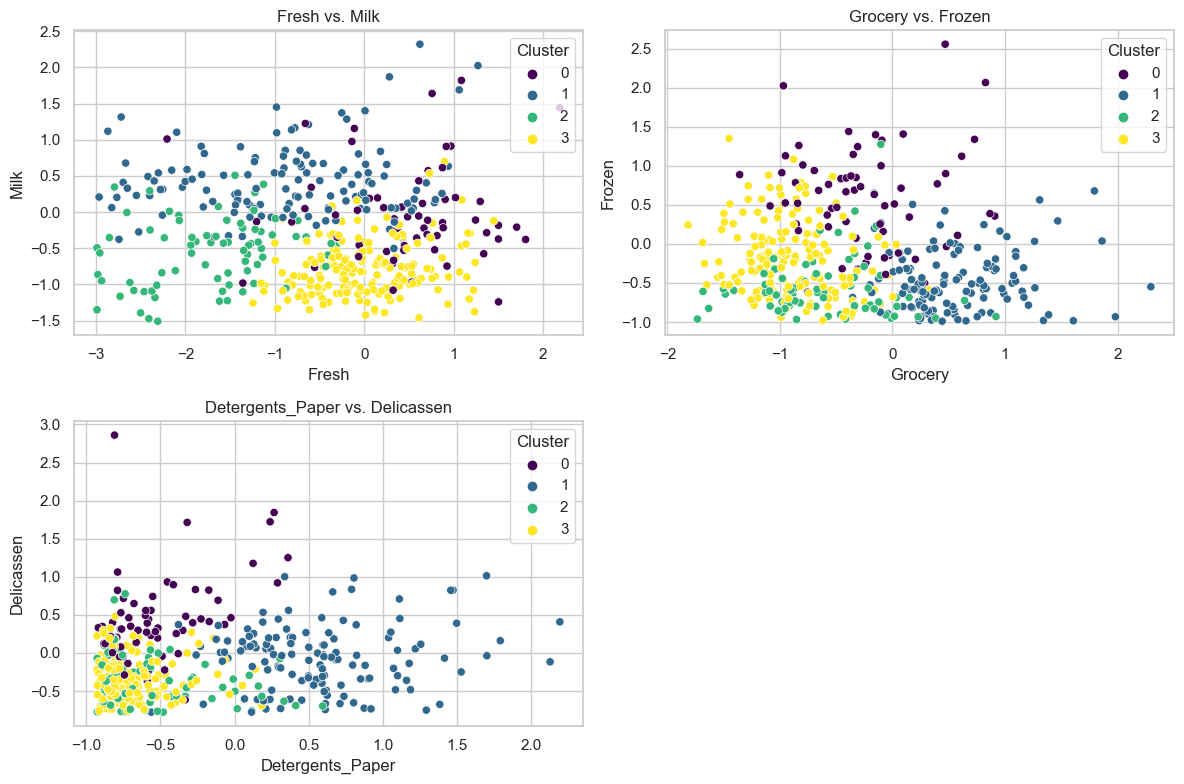

In [193]:
# 2.3 Visualising clusters and their distributions
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plots
plt.figure(figsize=(12, 8))

# Scatter plot for Fresh vs. Milk
plt.subplot(2, 2, 1)
sns.scatterplot(x='Fresh', y='Milk', hue='Cluster', data=df_grocery, palette='viridis')
plt.title('Fresh vs. Milk')

# Scatter plot for Grocery vs. Frozen
plt.subplot(2, 2, 2)
sns.scatterplot(x='Grocery', y='Frozen', hue='Cluster', data=df_grocery, palette='viridis')
plt.title('Grocery vs. Frozen')

# Scatter plot for Detergents_Paper vs. Delicassen
plt.subplot(2, 2, 3)
sns.scatterplot(x='Detergents_Paper', y='Delicassen', hue='Cluster', data=df_grocery, palette='viridis')
plt.title('Detergents_Paper vs. Delicassen')

# Show the plots
plt.tight_layout()
plt.show()








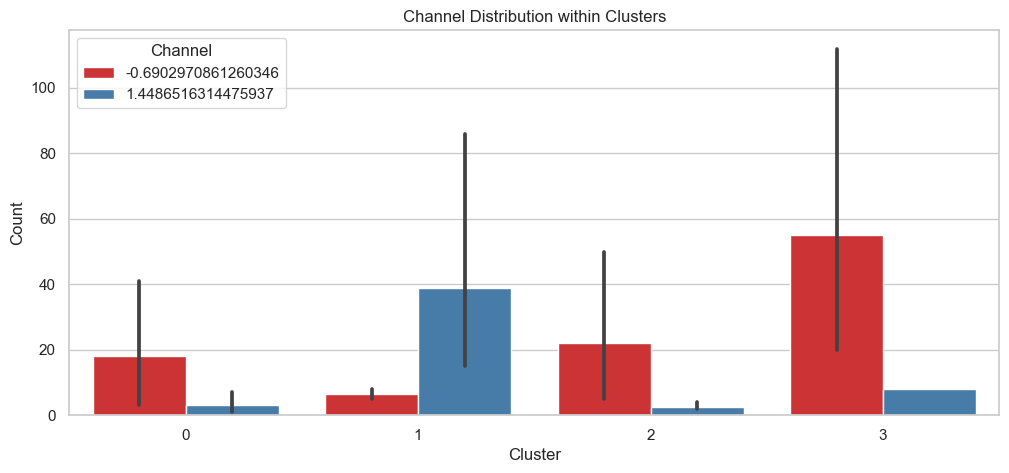

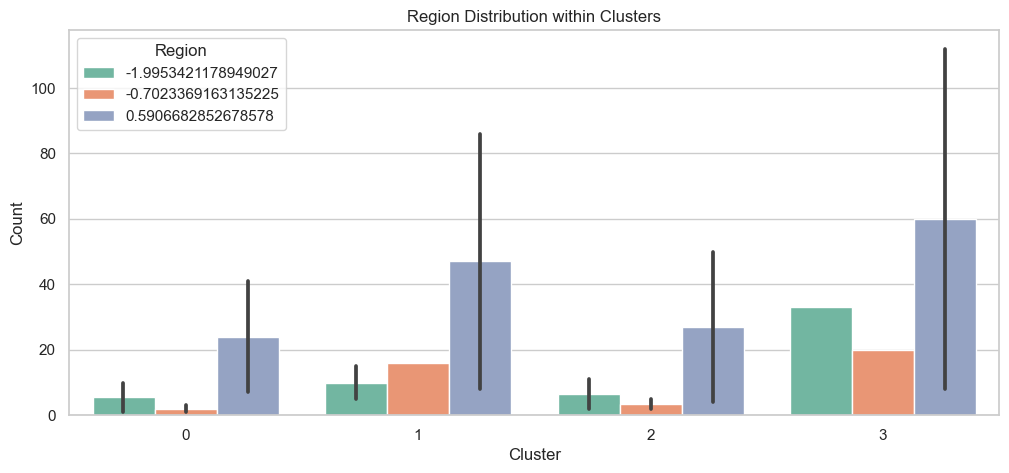

In [194]:
# 2.4 Analysing the demographics of each cluster

# Group data by Cluster and analyze Channel and Region
cluster_demographics = df_grocery.groupby(['Cluster', 'Channel', 'Region']).size().reset_index(name='Count')

# Create a bar plot for Channel distribution within each cluster
plt.figure(figsize=(12, 5))
sns.barplot(x='Cluster', y='Count', hue='Channel', data=cluster_demographics, palette='Set1')
plt.title('Channel Distribution within Clusters')
plt.show()

# Create a bar plot for Region distribution within each cluster
plt.figure(figsize=(12, 5))
sns.barplot(x='Cluster', y='Count', hue='Region', data=cluster_demographics, palette='Set2')
plt.title('Region Distribution within Clusters')
plt.show()


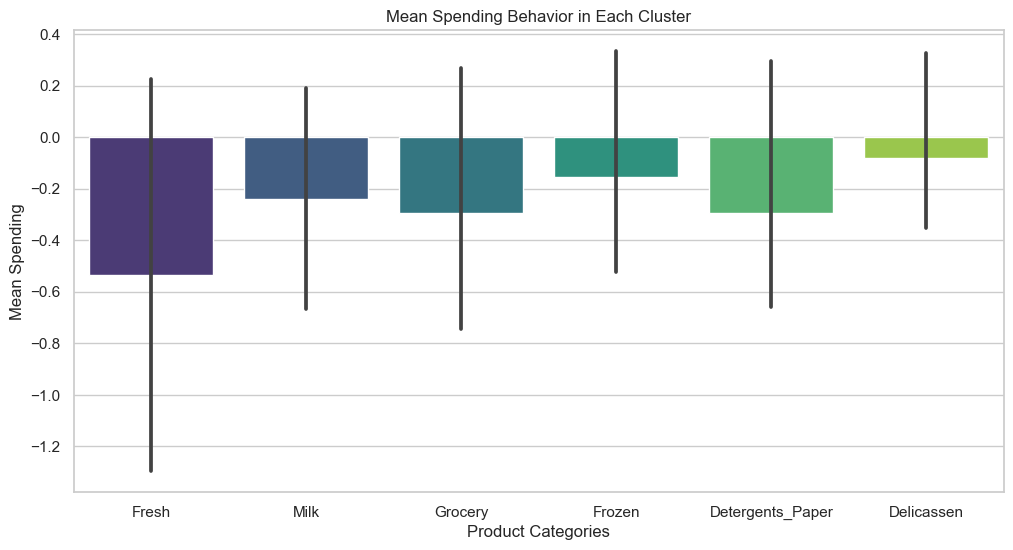

In [195]:
# 2.5 trying to analyse custom behaviour

# Calculate the mean spending behavior for each cluster and product category
cluster_spending_behavior = df_grocery.groupby(['Cluster'])[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

# Visualize the spending behavior within each cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_spending_behavior, palette='viridis')
plt.title('Mean Spending Behavior in Each Cluster')
plt.xlabel('Product Categories')
plt.ylabel('Mean Spending')
plt.show()

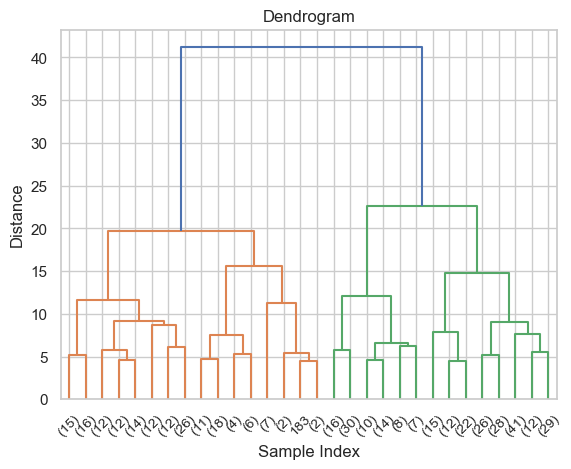

In [202]:
# Part 3 Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

# Extracting the relevant columns for clustering
columns_for_clustering = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df_grocery[columns_for_clustering]

#3.1 Creating dendrogram to help find the optimal number of clusters
dendrogram_ = dendrogram(ward(X_scaled), truncate_mode='lastp', p=30)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()





In [197]:
# 3.2 Based on the dendogram, let's choose 4  clusters
n_clusters = 4

# Apply hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = clustering.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df_grocery['Cluster'] = clusters

In [198]:
df_grocery.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,1.448652,0.590668,0.051580,0.421055,-0.041984,-0.890056,-0.044546,-0.068642,0
1,1.448652,0.590668,-0.496433,0.434673,0.157276,-0.314897,0.082876,0.085399,3
2,1.448652,0.590668,-0.592450,0.342552,-0.028561,-0.147962,0.125073,1.176589,0
3,-0.690297,0.590668,0.095411,-0.978219,-0.499188,0.523037,-0.690328,0.089302,2
4,1.448652,0.590668,0.609896,-0.053819,-0.082682,0.160296,-0.263859,0.832625,0


In [199]:
# 3.3 calculating summary statistics for each cluster

# Group the data by 'Cluster' and calculate summary statistics
cluster_summary = df_grocery.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].agg(['mean', 'median', 'std'])

# Display the summary statistics
print(cluster_summary)


            Fresh                          Milk                       Grocery  \
             mean    median       std      mean    median       std      mean   
Cluster                                                                         
0        0.207152  0.353655  0.791001  0.432896  0.181115  0.757614  0.197473   
1       -0.461853 -0.283160  0.967657 -0.736114 -0.782561  0.424019 -0.824021   
2        0.114455  0.250901  0.914092 -0.538601 -0.610463  0.468783 -0.690021   
3       -1.221586 -1.209591  0.940157  0.301039  0.267063  0.451093  0.507869   

                               Frozen                     Detergents_Paper  \
           median       std      mean    median       std             mean   
Cluster                                                                      
0        0.094015  0.740741 -0.145940 -0.315745  0.606949        -0.021387   
1       -0.877764  0.419147 -0.469103 -0.517817  0.299959        -0.674586   
2       -0.769546  0.496898  0.659089  0.6

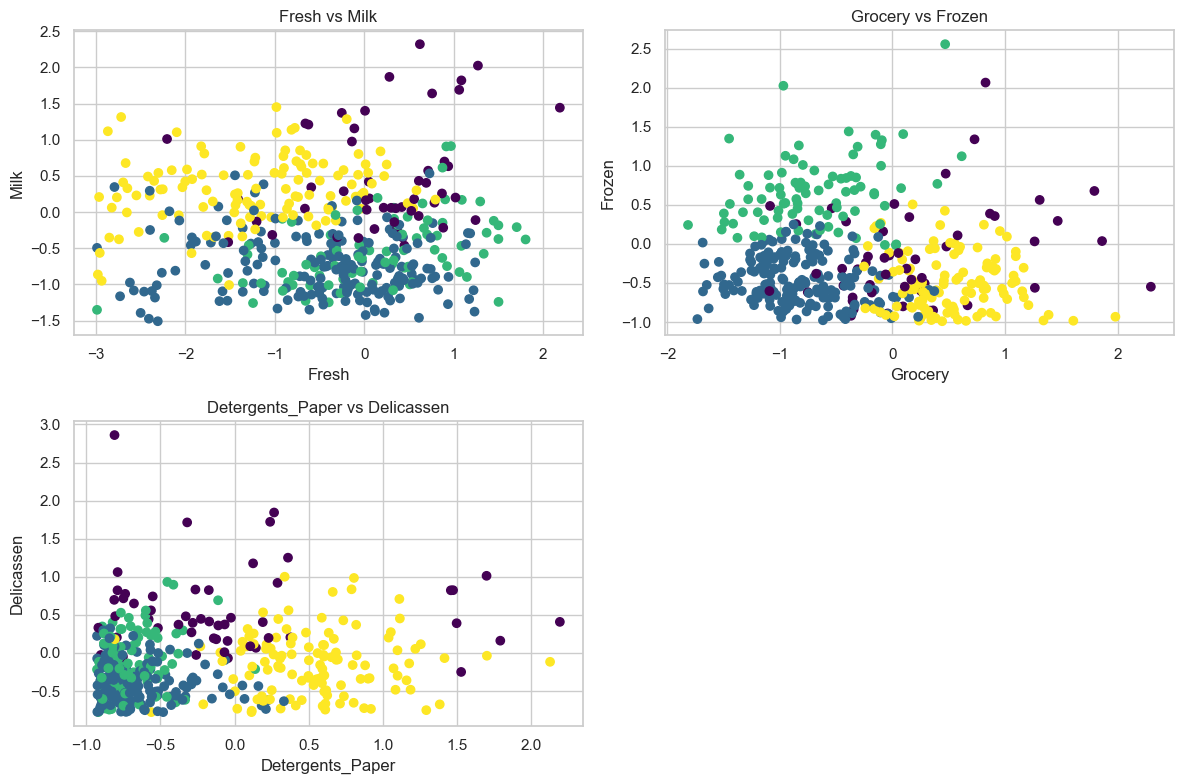

In [200]:
# 3.4 visualising the clusters
from pandas.plotting import parallel_coordinates

# Scatter Plots
plt.figure(figsize=(12, 8))

# Scatter plot of 'Fresh' vs 'Milk' with color-coded clusters
plt.subplot(2, 2, 1)
plt.scatter(df_grocery['Fresh'], df_grocery['Milk'], c=df_grocery['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh vs Milk')

# Scatter plot of 'Grocery' vs 'Frozen' with color-coded clusters
plt.subplot(2, 2, 2)
plt.scatter(df_grocery['Grocery'], df_grocery['Frozen'], c=df_grocery['Cluster'], cmap='viridis')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.title('Grocery vs Frozen')

# Scatter plot of 'Detergents_Paper' vs 'Delicassen' with color-coded clusters
plt.subplot(2, 2, 3)
plt.scatter(df_grocery['Detergents_Paper'], df_grocery['Delicassen'], c=df_grocery['Cluster'], cmap='viridis')
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title('Detergents_Paper vs Delicassen')

plt.tight_layout()
plt.show()



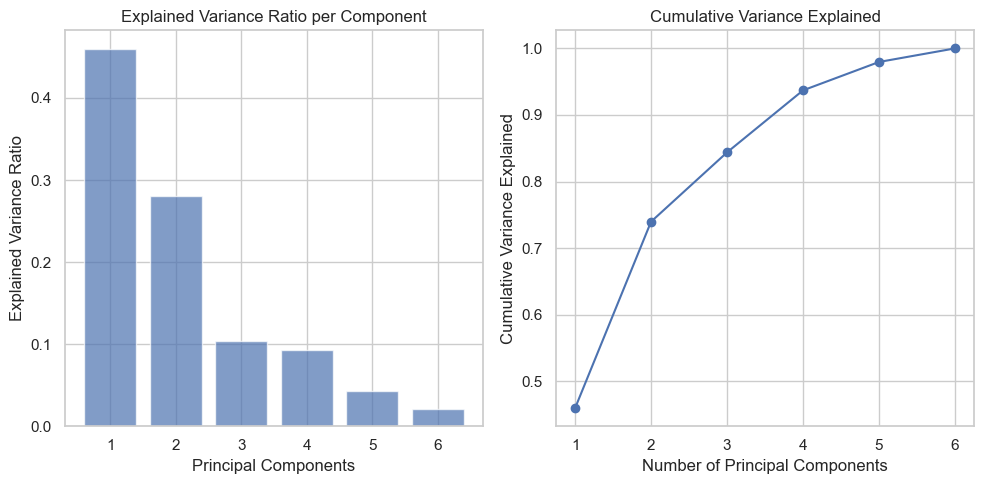

number of components retained: 5
Loadings (Component Weights):
                       PC1       PC2       PC3       PC4       PC5
Fresh            -0.185567  0.746193 -0.639940 -0.037341  0.007561
Milk              0.895165  0.159974 -0.000947  0.056215 -0.409960
Grocery           0.948027 -0.002328 -0.084174  0.106113  0.110020
Frozen           -0.161080  0.786856  0.320647  0.502045  0.047663
Detergents_Paper  0.905847 -0.179103 -0.126813  0.158382  0.252456
Delicassen        0.426262  0.672029  0.301266 -0.517169  0.101050

Feature Importance:
                       PC1       PC2       PC3       PC4       PC5
Fresh            -0.111643  0.574804 -0.808649 -0.049881  0.014931
Milk              0.538561  0.123231 -0.001197  0.075093 -0.809550
Grocery           0.570365 -0.001794 -0.106365  0.141747  0.217257
Frozen           -0.096911  0.606127  0.405179  0.670639  0.094121
Detergents_Paper  0.544988 -0.137966 -0.160244  0.211569  0.498527
Delicassen        0.256453  0.517674  0.38068

In [201]:
# Part 4 Performing Principal Component Analysis

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting relevant columns for PCA
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df_grocery[features]

# Standardize the feature matrix
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca.fit(X_std)

# Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_

# Cumulative Variance ratio
cumulative_var_ratio = explained_var_ratio.cumsum()

# Scree Plot for Explained Variance Ratio
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Component')

# Scree Plot for Cumulative Variance Explained
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

# Determine the number of principal components needed to retain at least 95% of the total variance in the dataset. 
n_components = (cumulative_var_ratio <= 0.95).sum() + 1
print ("number of components retained:", n_components)

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# to understand the underlying structure of data
# Interpretation of components (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i}' for i in range(1, n_components+1)], index=features)

# Display the loadings
print("Loadings (Component Weights):")
print(loadings_df)

# Interpretation of components (feature importance)
feature_importance = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components+1)], index=features)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance)

The number of principal components that can be retained in the dataset is found to be 5 which can explain 95% of variance in the data. This can also be validated by plotting scree plot where Cumulative Variance explained starts becoming flat after 5 components have been added.